# Traffic Sign Classification
This code aims to classify images of traffic signs based on their meaning using a convolutional neural network made on tensorflow, into 58 classes (in labels.csv). The link to the original dataset can be found at: https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/data. 

## 1 - Library Imports
The first step is to import the required libraries:
- *pandas* for processing the csv
- *os* and *shutil* for dividing the data into directories. 
- *tensorflow* for the neural network
- *matplotlib* for visualising the data in graphs

In [2]:
import pandas as pd
import os
import shutil
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt

## 2 - Data Preprocessing
The first step is to load in the names of the classes from the csv file.

In [2]:
names = pd.read_csv("/Users/mariamelantably/Desktop/programs/vais internship/CNN project/labels.csv")["Name"].tolist()
names

['Speed limit (5km/h)',
 'Speed limit (15km/h)',
 'Speed limit (30km/h)',
 'Speed limit (40km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'speed limit (80km/h)',
 'Dont Go straight or left',
 'Dont Go straight or Right',
 'Dont Go straight',
 'Dont Go Left',
 'Dont Go Left or Right',
 'Dont Go Right',
 'Dont overtake from Left',
 'No Uturn',
 'No Car',
 'No horn',
 'Speed limit (40km/h)',
 'Speed limit (50km/h)',
 'Go straight or right',
 'Go straight',
 'Go Left',
 'Go Left or right',
 'Go Right',
 'keep Left',
 'keep Right',
 'Roundabout mandatory',
 'watch out for cars',
 'Horn',
 'Bicycles crossing',
 'Uturn',
 'Road Divider',
 'Traffic signals',
 'Danger Ahead',
 'Zebra Crossing',
 'Bicycles crossing',
 'Children crossing',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Unknown1',
 'Unknown2',
 'Unknown3',
 'Go right or straight',
 'Go left or straight',
 'Unknown4',
 'ZigZag Curve',
 'Train Crossing',
 'Under Construction',

Then, the training images dataset must be loaded in from the appropriate directory. All images were set to be 180*180.

In [3]:
img_height = 180
img_width = 180
train_images = tf.keras.utils.image_dataset_from_directory("/Users/mariamelantably/Desktop/programs/vais internship/CNN project/traffic_Data/DATA", image_size = (img_height, img_width), label_mode='int', batch_size=25)                                      

Found 4170 files belonging to 58 classes.


After this, I divided the testing data into directories based on the class of the image, and used this to load in the testing dataset.

In [4]:
for i in range(58):
    try:
        os.mkdir(f"/Users/mariamelantably/Desktop/programs/vais internship/CNN project/traffic_Data/TEST/{i}")
    except:
        pass
for item in os.listdir("/Users/mariamelantably/Desktop/programs/vais internship/CNN project/traffic_Data/TEST"):
    name = item[0:3]
    shutil.move("/Users/mariamelantably/Desktop/programs/vais internship/CNN project/traffic_Data/TEST/"+item, f"/Users/mariamelantably/Desktop/programs/vais internship/CNN project/traffic_Data/TEST/{int(name)}")
test_images = tf.keras.preprocessing.image_dataset_from_directory("/Users/mariamelantably/Desktop/programs/vais internship/CNN project/traffic_Data/TEST", image_size = (img_height, img_width), label_mode = 'int', batch_size=25)    
test_images                 

Found 1994 files belonging to 58 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

To visualise the data, I created a plot of some of the different signs in the dataset, and what they meant. 

2025-08-20 19:22:43.125859: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


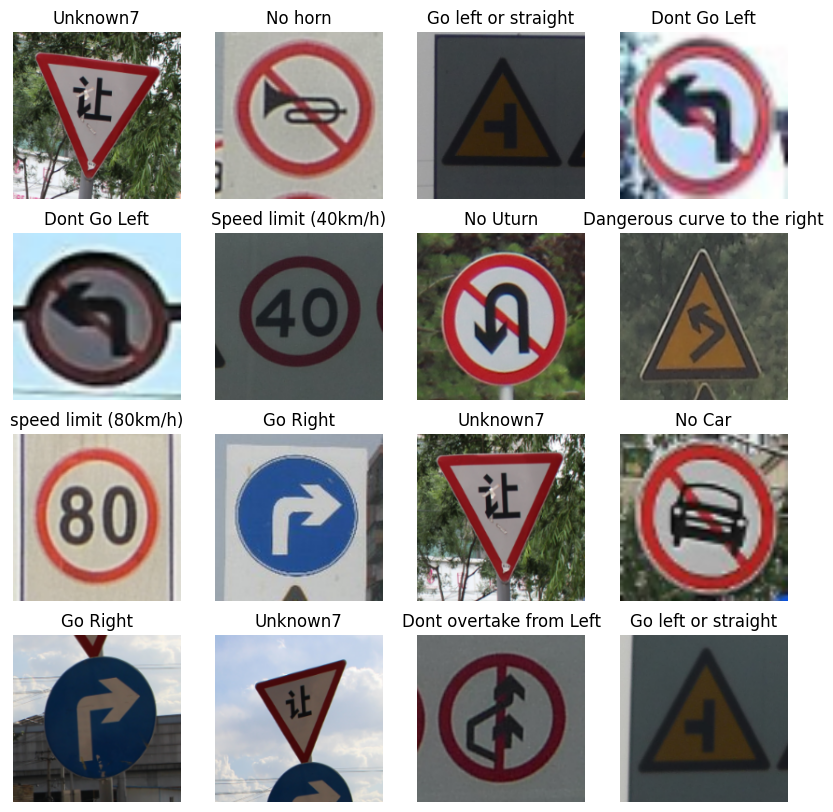

In [5]:
plt.figure(figsize = (10, 10))
for images, labels in train_images.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(names[int(train_images.class_names[labels[i]])])
        plt.axis("off")
plt.show()

Finally, I normalised all the pixels in the training and testing datasets, to ensure all pixels were in the ranges of [0..1].

In [1]:
normalisation_layer = tf.keras.layers.Rescaling(1./255)
training_ds_n = train_images.map(lambda x, y: (normalisation_layer(x), y))
testing_ds_n = test_images.map(lambda x, y: (normalisation_layer(x), y))

NameError: name 'tf' is not defined

## 3 - Model Creation
The next step is to create the model, which will use relu as the activation function, consisting of 3 convultional layers and 2 pooling layers. 

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #normally power of 2 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Above these layers, I then added a flatten layer - to convert the output from 3D to 1D - followed by two dense layers to carry out the classification function. 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(58))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107584)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     6,885,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 58)             │         3,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,945,530 (26.50 MB)

 Trainable params: 6,945,530 (26.50 MB)

 Non-trainable params: 0 (0.00 B)

The next step was to compile the model, using Spare Categorical Crossentropy as the loss function, to deal with the multi-class integer labels. The model was then trained for 5 epochs using the normalised training data set and validated using the normalised testing dataset. 

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy',])
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)
history = model.fit(training_ds_n, epochs = 7, validation_data = testing_ds_n)

Epoch 1/7
167/167 ━━━━━━━━━━━━━━━━━━━━ 29s 168ms/step - accuracy: 0.5012 - loss: 2.0887 - val_accuracy: 0.4122 - val_loss: 2.9455
Epoch 2/7
167/167 ━━━━━━━━━━━━━━━━━━━━ 28s 167ms/step - accuracy: 0.8911 - loss: 0.4034 - val_accuracy: 0.4534 - val_loss: 3.5660
Epoch 3/7
167/167 ━━━━━━━━━━━━━━━━━━━━ 28s 170ms/step - accuracy: 0.9576 - loss: 0.1440 - val_accuracy: 0.4694 - val_loss: 4.4398
Epoch 4/7
167/167 ━━━━━━━━━━━━━━━━━━━━ 28s 169ms/step - accuracy: 0.9873 - loss: 0.0536 - val_accuracy: 0.5306 - val_loss: 4.9529
Epoch 5/7
167/167 ━━━━━━━━━━━━━━━━━━━━ 29s 171ms/step - accuracy: 0.9962 - loss: 0.0177 - val_accuracy: 0.5246 - val_loss: 4.6868
Epoch 6/7
167/167 ━━━━━━━━━━━━━━━━━━━━ 28s 170ms/step - accuracy: 0.9887 - loss: 0.0402 - val_accuracy: 0.5115 - val_loss: 4.5453
Epoch 7/7
167/167 ━━━━━━━━━━━━━━━━━━━━ 28s 169ms/step - accuracy: 0.9918 - loss: 0.0298 - val_accuracy: 0.5226 - val_loss: 5.7167


## 4 - Analysing Accuracy 
The final step is to look at how the accuracy of the model improved as the number of epochs increased, as shown in the graph below

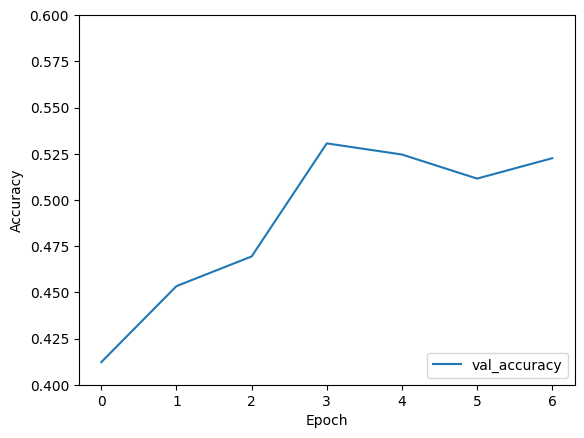

In [10]:
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 0.6])
plt.legend(loc='lower right')